In [ ]:
# Visualization of a chunk and its infor

### Overview
    
* **questions:**
    * Find, anaylize, & visualize sampling chunks selected from satellite imagery
    * Distinguish between spectral reflances from different landcover types
    

In [6]:
from data_tools import *
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img_dir='/home/jovyan/Planet/planet_flat'
tif_fns=fn_list(img_dir,"*_refl.tif")

/home/jovyan/Planet/planet_flat/703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/794418_1060719_2017-09-28_0f35_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2574848_1060718_2019-08-04_0f4e_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2574618_1060618_2019-08-04_0f3d_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2548533_1060719_2019-07-25_0f15_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2575093_1060719_2019-08-04_1039_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644798_1060618_2017-07-25_103d_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644800_1060619_2017-07-25_100b_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/644800_1060718_2017-07-25_100b_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2631559_1060618_2019-08-27_1032_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/2575165_1060719_2019-08-04_105c_BGRN_Analytic_refl.tif
/home/jovyan/Planet/planet_flat/795543_1060618_2

In [12]:
# Full image array
blue_full=np.ma.masked_equal(read_raster(tif_fns[2],band=1)[0],0).astype(float)
green_full=np.ma.masked_equal(read_raster(tif_fns[2],band=2)[0],0).astype(float)
red_full=np.ma.masked_equal(read_raster(tif_fns[2],band=3)[0],0).astype(float)
nir_full=np.ma.masked_equal(read_raster(tif_fns[2],band=4)[0],0).astype(float)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


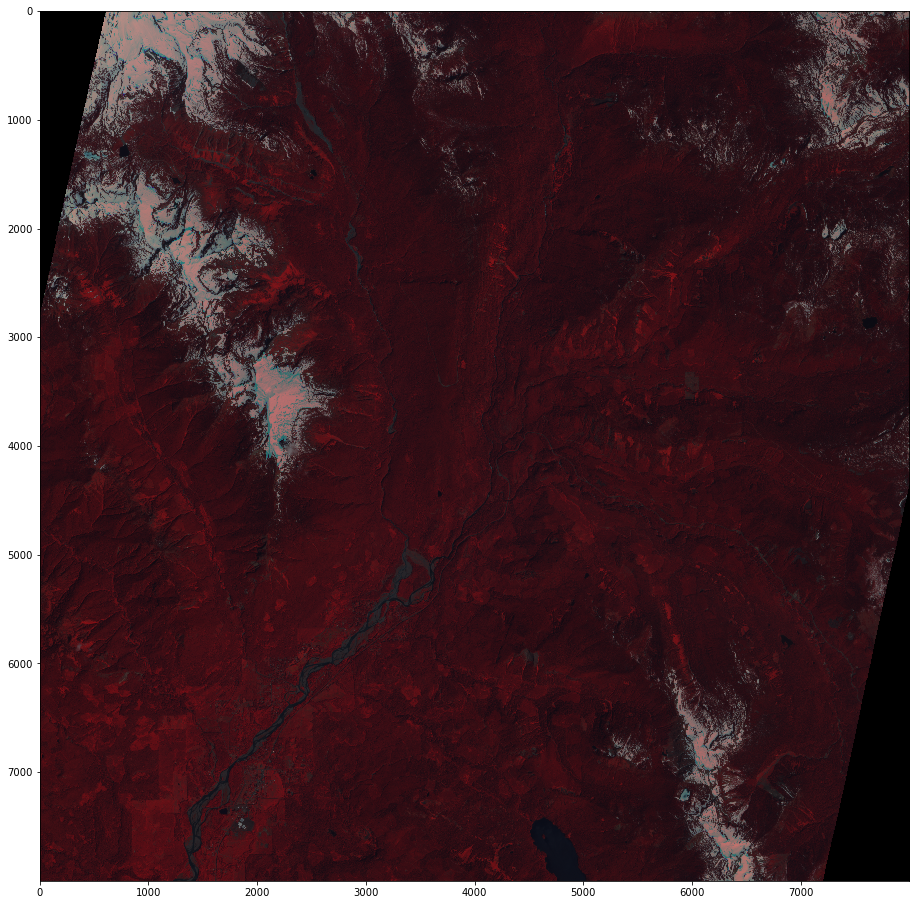

In [13]:
#red_nir_f=red_full/nir_full
ndvi_f=ndvi = np.divide((nir_full-red_full),(nir_full+red_full))
np.seterr(divide='ignore', invalid='ignore')
rgb_img_f=np.dstack((nir_full/10000,red_full/10000, blue_full/10000))
plt.figure(figsize=(16,16))
plt.imshow(rgb_img_f)

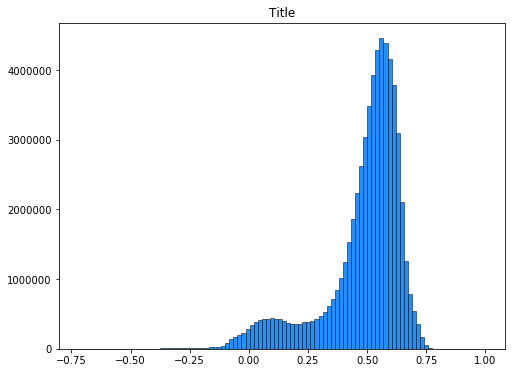

In [14]:
histo_me(ndvi_f)

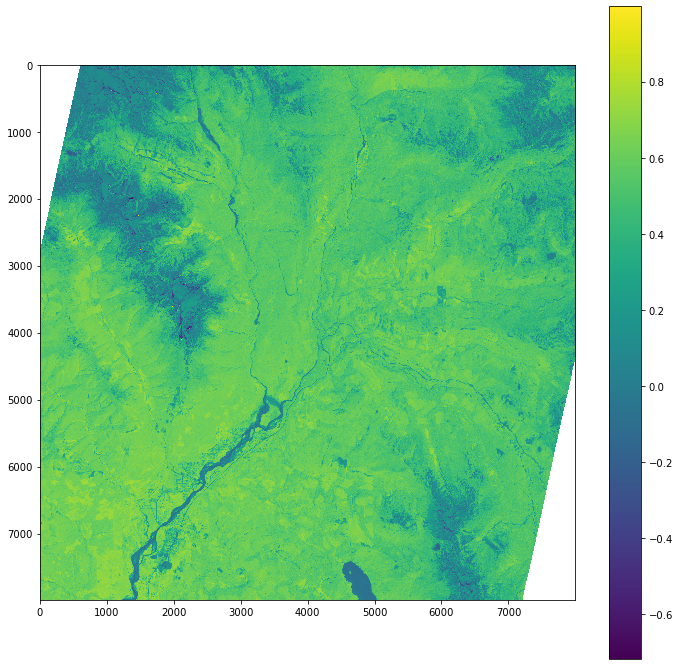

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(ndvi_f)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


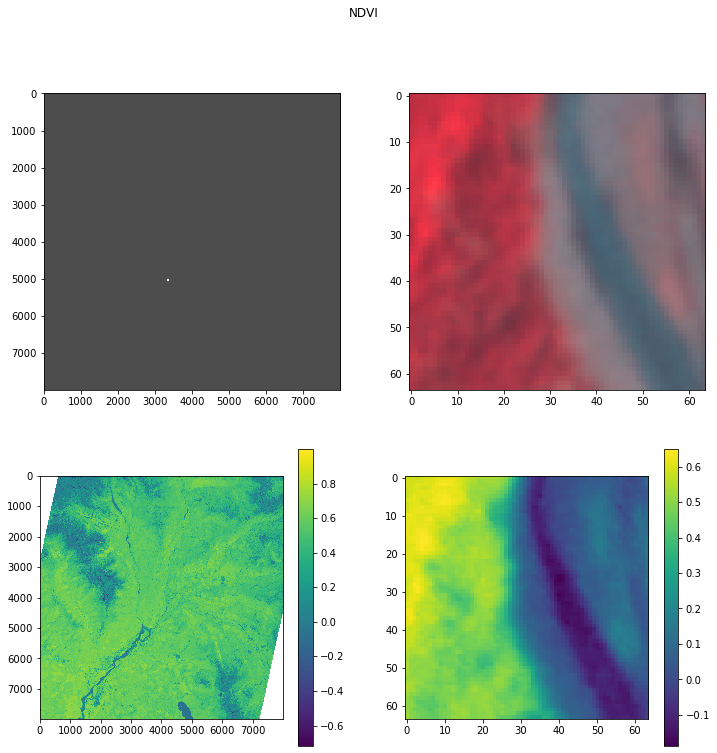

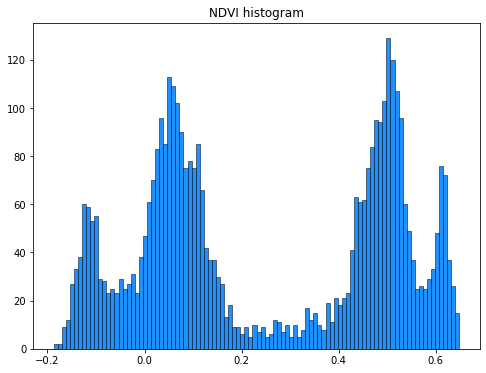

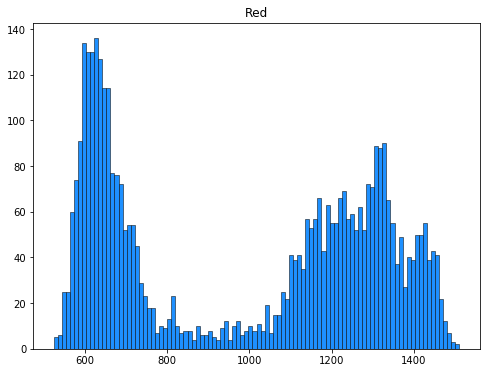

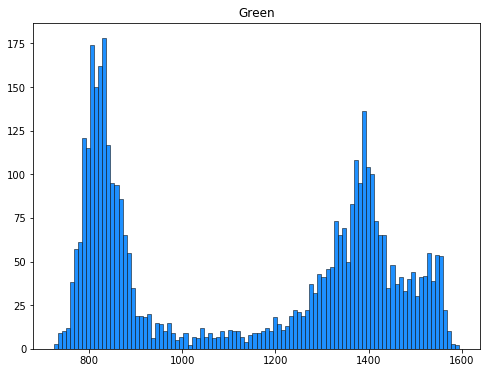

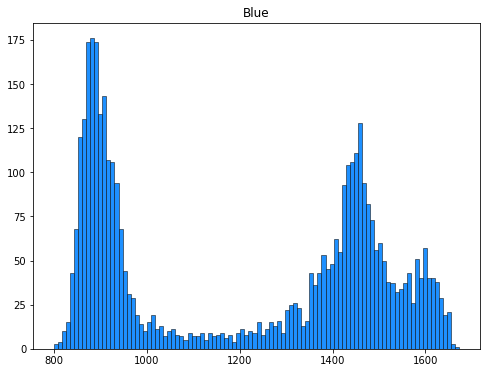

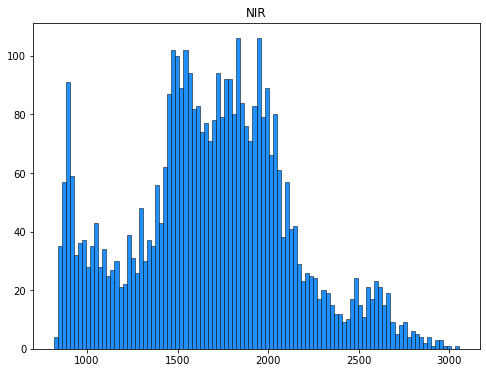

In [55]:
#choose the chunk location
x1=5000
x2=5064
y1=3300
y2=3364
#Read the data
blue=read_raster(tif_fns[2],band=1)[0][x1:x2,y1:y2].astype(float)
green=read_raster(tif_fns[2],band=2)[0][x1:x2,y1:y2].astype(float)
red=read_raster(tif_fns[2],band=3)[0][x1:x2,y1:y2].astype(float)
nir=read_raster(tif_fns[2],band=4)[0][x1:x2,y1:y2].astype(float)
ndvi=(nir-red)/(nir+red)
# create visualization of chunk location
rgb_img1=np.dstack((nir/3000,red/3000,green/3000))
mask = np.zeros((8000,8000))
mask[x1:x2,y1:y2] = 1 # white square in black background
im1 = mask + ndvi_f # random image
masked = np.ma.masked_where(mask == 0, mask)

plt.figure(figsize=(12,12))
#visualize NDVI for the whole scene
plt.subplot(2,2,3)
plt.suptitle('NDVI')
plt.imshow(ndvi_f)
plt.colorbar()
#visualize location in the whole scene
plt.subplot(2,2,1)
plt.suptitle('Sample Location')
plt.imshow(mask, 'gray', interpolation='none', alpha=0.7)
#Plot the chunk in RGB
plt.subplot(2,2,2)
plt.suptitle('RGB plot')
plt.imshow(rgb_img1)
#Plot the chunk in NDVI
plt.subplot(2,2,4)
plt.suptitle('NDVI')
plt.imshow(ndvi)
plt.colorbar()
plt.show()
#Plot Histogram
histo_me(ndvi,title="NDVI histogram")
histo_me(red,title="Red")
histo_me(green,title="Green")
histo_me(blue,title="Blue")
histo_me(nir,title="NIR")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


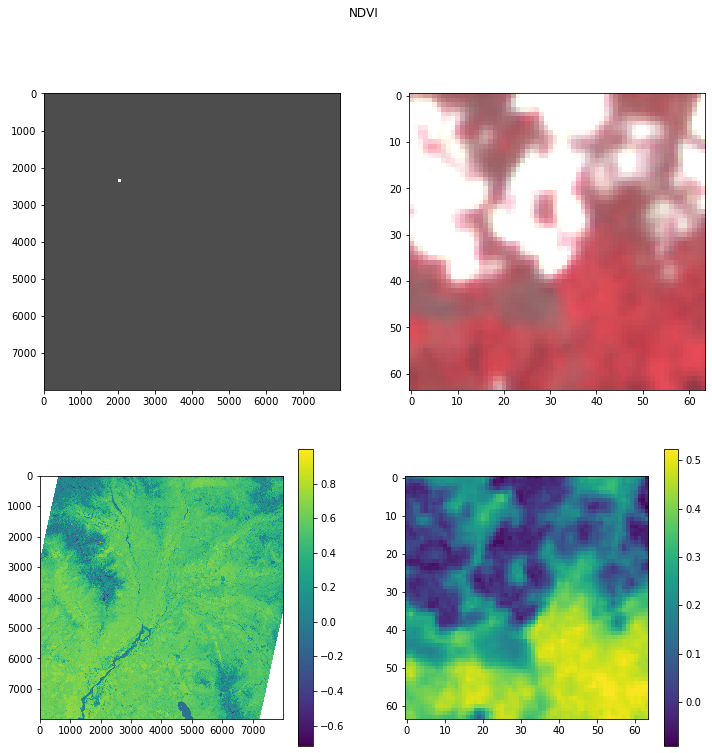

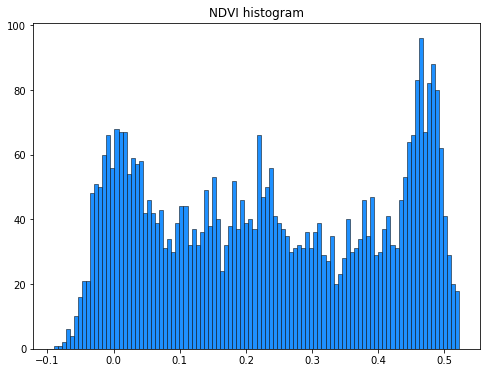

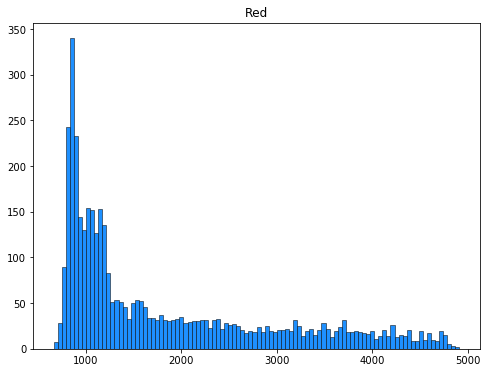

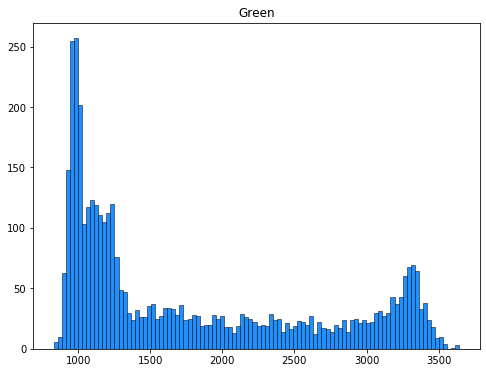

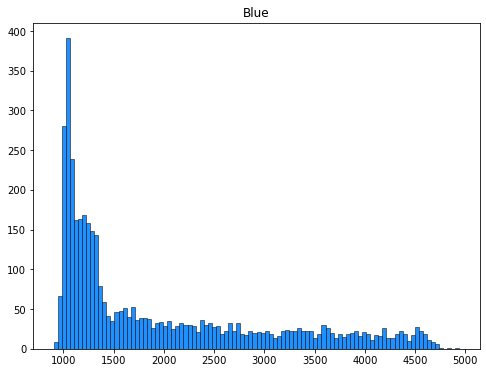

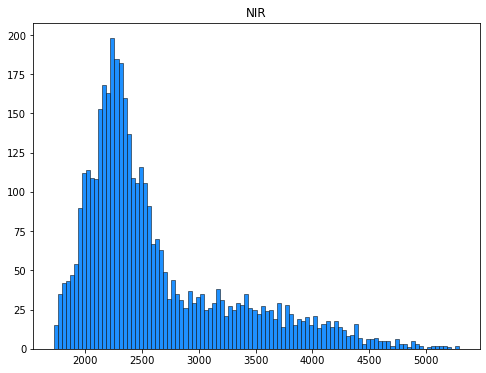

In [56]:
#choose the chunk location
x1=2320
x2=2384
y1=2000
y2=2064
#Read the data
blue=read_raster(tif_fns[2],band=1)[0][x1:x2,y1:y2].astype(float)
green=read_raster(tif_fns[2],band=2)[0][x1:x2,y1:y2].astype(float)
red=read_raster(tif_fns[2],band=3)[0][x1:x2,y1:y2].astype(float)
nir=read_raster(tif_fns[2],band=4)[0][x1:x2,y1:y2].astype(float)
ndvi=(nir-red)/(nir+red)
# create visualization of chunk location
rgb_img1=np.dstack((nir/3000,red/3000,green/3000))
mask = np.zeros((8000,8000))
mask[x1:x2,y1:y2] = 1 # white square in black background
im1 = mask + ndvi_f # random image
masked = np.ma.masked_where(mask == 0, mask)

plt.figure(figsize=(12,12))
#visualize NDVI for the whole scene
plt.subplot(2,2,3)
plt.suptitle('NDVI')
plt.imshow(ndvi_f)
plt.colorbar()
#visualize location in the whole scene
plt.subplot(2,2,1)
plt.suptitle('Sample Location')
plt.imshow(mask, 'gray', interpolation='none', alpha=0.7)
#Plot the chunk in RGB
plt.subplot(2,2,2)
plt.suptitle('RGB plot')
plt.imshow(rgb_img1)
#Plot the chunk in NDVI
plt.subplot(2,2,4)
plt.suptitle('NDVI')
plt.imshow(ndvi)
plt.colorbar()
plt.show()
#Plot Histogram
histo_me(ndvi,title="NDVI histogram")
histo_me(red,title="Red")
histo_me(green,title="Green")
histo_me(blue,title="Blue")
histo_me(nir,title="NIR")


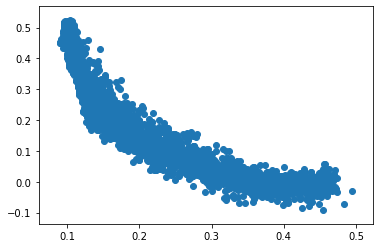

In [93]:
plt.scatter(blue/10000, ndvi)


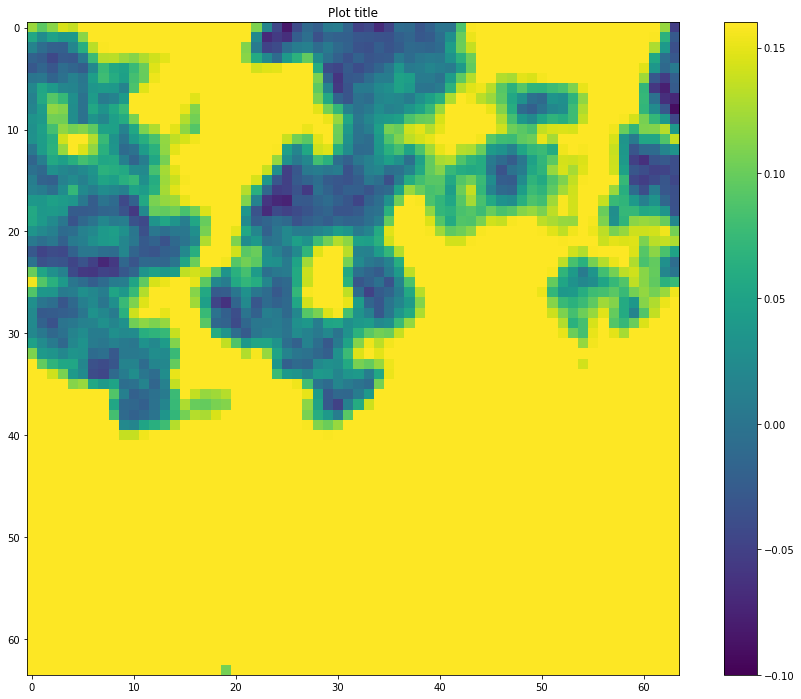

In [92]:
plot_me(ndvi, vmin=-0.1,vmax=0.16,cmap='viridis')

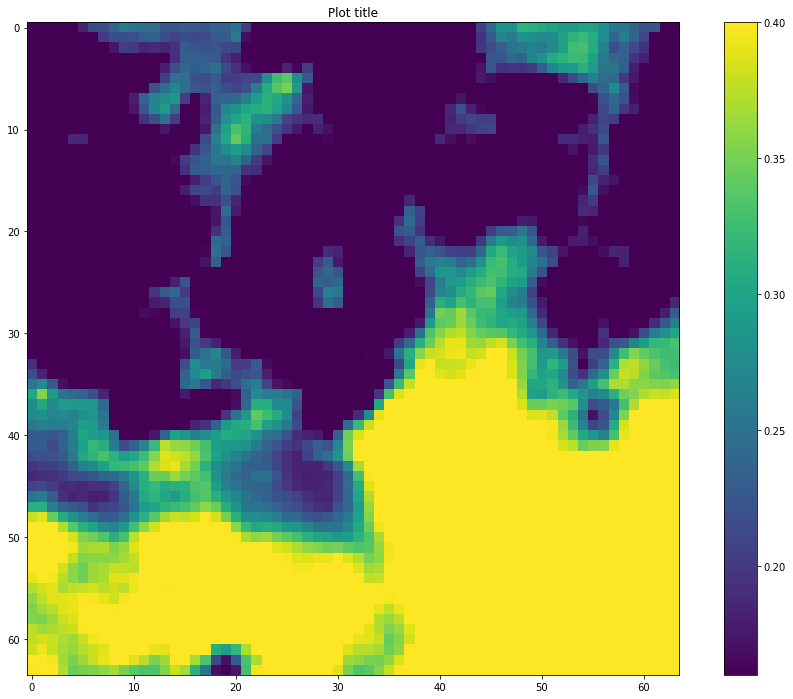

In [91]:
plot_me(ndvi, vmin=0.16,vmax=0.4,cmap='viridis')

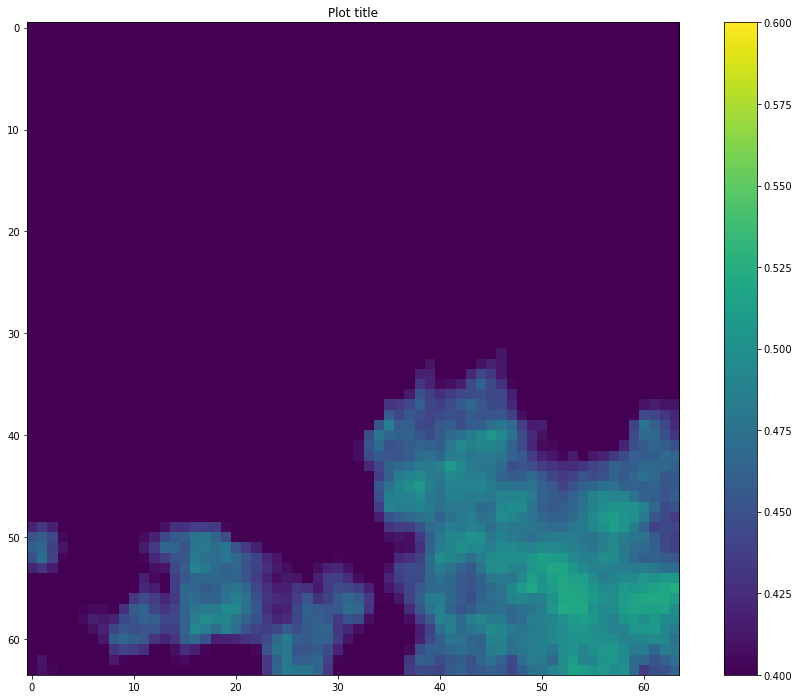

In [90]:
#vegetation
plot_me(ndvi, vmin=0.4,vmax=0.6,cmap='viridis')